In [ ]:
# Import the required packages
import numpy as np
import pandas as pd
import math
from sklearn.metrics import ndcg_score, dcg_score
# Load the dataset
train_df = pd.read_csv("train_VP.txt", delimiter=" ", header=None)
#val_df = pd.read_csv("vali.txt", delimiter=" ", header=None)
#test_df = pd.read_csv("test.txt", delimiter=" ", header=None)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0,qid:10002,1:0.007477,2:0.000000,3:1.000000,4:0.000000,5:0.007470,6:0.000000,7:0.000000,8:0.000000,...,46:0.007042,#docid,=,GX008-86-4444840,inc,=,1.000000,prob,=,0.086622
1,0,qid:10002,1:0.603738,2:0.000000,3:1.000000,4:0.000000,5:0.603175,6:0.000000,7:0.000000,8:0.000000,...,46:1.000000,#docid,=,GX037-06-11625428,inc,=,0.003159,prob,=,0.089745
2,0,qid:10002,1:0.214953,2:0.000000,3:0.000000,4:0.000000,5:0.213819,6:0.000000,7:0.000000,8:0.000000,...,46:0.021127,#docid,=,GX044-30-4142998,inc,=,0.008419,prob,=,0.099974
3,0,qid:10002,1:0.000000,2:0.000000,3:1.000000,4:0.000000,5:0.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX228-42-3888699,inc,=,0.008419,prob,=,0.044481
4,0,qid:10002,1:1.000000,2:1.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX229-14-12863205,inc,=,1.000000,prob,=,0.041016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,0,qid:10800,1:1.000000,2:0.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX252-84-3732441,inc,=,1.000000,prob,=,0.100400
1380,0,qid:10800,1:0.070871,2:0.000000,3:0.000000,4:0.000000,5:0.069753,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX264-20-7701348,inc,=,1.000000,prob,=,0.162516
1381,0,qid:10800,1:0.288889,2:0.000000,3:0.000000,4:0.000000,5:0.288034,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX266-18-8678946,inc,=,1.000000,prob,=,0.128195
1382,0,qid:10800,1:0.406006,2:0.000000,3:0.000000,4:0.000000,5:0.405292,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX268-79-2923622,inc,=,1.000000,prob,=,0.094546


In [ ]:
new_qid=[]
for i in train_df[1]:
  new_qid.append((i[4:]))
train_df.drop(1)
train_df[1]=new_qid

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0,10002,1:0.007477,2:0.000000,3:1.000000,4:0.000000,5:0.007470,6:0.000000,7:0.000000,8:0.000000,...,46:0.007042,#docid,=,GX008-86-4444840,inc,=,1.000000,prob,=,0.086622
1,0,10002,1:0.603738,2:0.000000,3:1.000000,4:0.000000,5:0.603175,6:0.000000,7:0.000000,8:0.000000,...,46:1.000000,#docid,=,GX037-06-11625428,inc,=,0.003159,prob,=,0.089745
2,0,10002,1:0.214953,2:0.000000,3:0.000000,4:0.000000,5:0.213819,6:0.000000,7:0.000000,8:0.000000,...,46:0.021127,#docid,=,GX044-30-4142998,inc,=,0.008419,prob,=,0.099974
3,0,10002,1:0.000000,2:0.000000,3:1.000000,4:0.000000,5:0.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX228-42-3888699,inc,=,0.008419,prob,=,0.044481
4,0,10002,1:1.000000,2:1.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX229-14-12863205,inc,=,1.000000,prob,=,0.041016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,0,10800,1:1.000000,2:0.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX252-84-3732441,inc,=,1.000000,prob,=,0.100400
1380,0,10800,1:0.070871,2:0.000000,3:0.000000,4:0.000000,5:0.069753,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX264-20-7701348,inc,=,1.000000,prob,=,0.162516
1381,0,10800,1:0.288889,2:0.000000,3:0.000000,4:0.000000,5:0.288034,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX266-18-8678946,inc,=,1.000000,prob,=,0.128195
1382,0,10800,1:0.406006,2:0.000000,3:0.000000,4:0.000000,5:0.405292,6:0.000000,7:0.000000,8:0.000000,...,46:0.000000,#docid,=,GX268-79-2923622,inc,=,1.000000,prob,=,0.094546


In [ ]:
train_df.dtypes

0       int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
40     object
41     object
42     object
43     object
44     object
45     object
46     object
47     object
48     object
49     object
50     object
51     object
52     object
53    float64
54     object
55     object
56    float64
dtype: object

In [ ]:
my_lst=list(range(0,48))
train_df=train_df[my_lst]
train_df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,10002,1:0.007477,2:0.000000,3:1.000000,4:0.000000,5:0.007470,6:0.000000,7:0.000000,8:0.000000,...,37:0.797056,38:0.697327,39:0.721953,40:0.582568,41:0.000000,42:0.000000,43:0.000000,44:0.000000,45:0.000000,46:0.007042
1,0,10002,1:0.603738,2:0.000000,3:1.000000,4:0.000000,5:0.603175,6:0.000000,7:0.000000,8:0.000000,...,37:0.000000,38:0.000000,39:0.117399,40:0.560607,41:0.000000,42:0.280000,43:0.000000,44:0.003708,45:0.333333,46:1.000000
2,0,10002,1:0.214953,2:0.000000,3:0.000000,4:0.000000,5:0.213819,6:0.000000,7:0.000000,8:0.000000,...,37:0.566409,38:0.760916,39:0.746370,40:1.000000,41:0.000000,42:0.000000,43:0.000000,44:1.000000,45:1.000000,46:0.021127
3,0,10002,1:0.000000,2:0.000000,3:1.000000,4:0.000000,5:0.000000,6:0.000000,7:0.000000,8:0.000000,...,37:0.320586,38:0.133604,39:0.000000,40:0.000000,41:0.250000,42:1.000000,43:0.000000,44:0.000000,45:0.000000,46:0.000000
4,0,10002,1:1.000000,2:1.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,37:0.341228,38:0.292567,39:0.385569,40:0.730347,41:1.000000,42:0.840000,43:0.000000,44:0.184564,45:0.666667,46:0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,0,10800,1:1.000000,2:0.000000,3:0.000000,4:0.000000,5:1.000000,6:0.000000,7:0.000000,8:0.000000,...,37:0.496728,38:0.480561,39:0.556021,40:0.584645,41:0.200000,42:0.615385,43:0.000000,44:0.011821,45:0.010526,46:0.000000
1380,0,10800,1:0.070871,2:0.000000,3:0.000000,4:0.000000,5:0.069753,6:0.000000,7:0.000000,8:0.000000,...,37:0.694516,38:0.926138,39:1.000000,40:0.940165,41:0.800000,42:0.769231,43:0.000000,44:0.090797,45:0.021053,46:0.000000
1381,0,10800,1:0.288889,2:0.000000,3:0.000000,4:0.000000,5:0.288034,6:0.000000,7:0.000000,8:0.000000,...,37:0.155545,38:0.482921,39:0.541379,40:0.540687,41:1.000000,42:0.820513,43:0.000000,44:0.004436,45:0.010526,46:0.000000
1382,0,10800,1:0.406006,2:0.000000,3:0.000000,4:0.000000,5:0.405292,6:0.000000,7:0.000000,8:0.000000,...,37:0.091120,38:0.466171,39:0.455499,40:0.497587,41:0.400000,42:0.307692,43:0.000000,44:0.047777,45:0.010526,46:0.000000


In [ ]:
def feat_proc(data):
     y=[]
     for i in data:
            ran=i.split(':')
            y.append(float(ran[1]))
     return y
for i in range(2,48):
   train_df[i]=feat_proc(train_df[i])
train_df

<ipython-input-7-f9c31fe1ceac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[i]=feat_proc(train_df[i])


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,10002,0.007477,0.0,1.0,0.0,0.007470,0.0,0.0,0.0,...,0.797056,0.697327,0.721953,0.582568,0.00,0.000000,0.0,0.000000,0.000000,0.007042
1,0,10002,0.603738,0.0,1.0,0.0,0.603175,0.0,0.0,0.0,...,0.000000,0.000000,0.117399,0.560607,0.00,0.280000,0.0,0.003708,0.333333,1.000000
2,0,10002,0.214953,0.0,0.0,0.0,0.213819,0.0,0.0,0.0,...,0.566409,0.760916,0.746370,1.000000,0.00,0.000000,0.0,1.000000,1.000000,0.021127
3,0,10002,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.320586,0.133604,0.000000,0.000000,0.25,1.000000,0.0,0.000000,0.000000,0.000000
4,0,10002,1.000000,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.341228,0.292567,0.385569,0.730347,1.00,0.840000,0.0,0.184564,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,0,10800,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.496728,0.480561,0.556021,0.584645,0.20,0.615385,0.0,0.011821,0.010526,0.000000
1380,0,10800,0.070871,0.0,0.0,0.0,0.069753,0.0,0.0,0.0,...,0.694516,0.926138,1.000000,0.940165,0.80,0.769231,0.0,0.090797,0.021053,0.000000
1381,0,10800,0.288889,0.0,0.0,0.0,0.288034,0.0,0.0,0.0,...,0.155545,0.482921,0.541379,0.540687,1.00,0.820513,0.0,0.004436,0.010526,0.000000
1382,0,10800,0.406006,0.0,0.0,0.0,0.405292,0.0,0.0,0.0,...,0.091120,0.466171,0.455499,0.497587,0.40,0.307692,0.0,0.047777,0.010526,0.000000


In [ ]:
#train_df[1]=pd.to_numeric(train_df[1])

In [ ]:
#train_df.dtypes

In [ ]:
X=train_df[list(range(2,48))]
y=train_df[0]

In [ ]:
len(list(set(train_df[1])))

79

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset for classification
#X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

1260    1
1156    2
820     0
704     0
1097    1
       ..
1095    1
1130    0
1294    1
860     1
1126    0
Name: 0, Length: 1107, dtype: int64

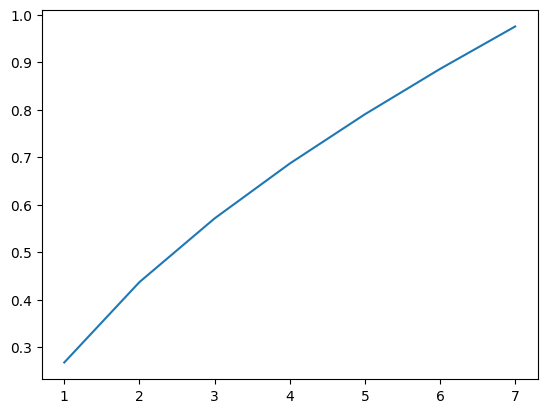

In [ ]:
# Initialize the gradient boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training set
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)
testy=np.array(y_test)
predy=np.array(y_pred)
predy=[list(predy)]
testy=[list(testy)]
ndcg_df=[]
idcg=dcg_score(testy,testy,k=3)
for i in range(1,8):
   dcg=dcg_score(testy,predy,k=i)
   ndcg_df.append(dcg/idcg)
plt.plot(list(range(1,8)),ndcg_df)

In [ ]:
accuracy_score(y_pred,y_test)

0.7689530685920578

In [ ]:
model=gb_clf
probs_re=model.predict_proba(X_test)

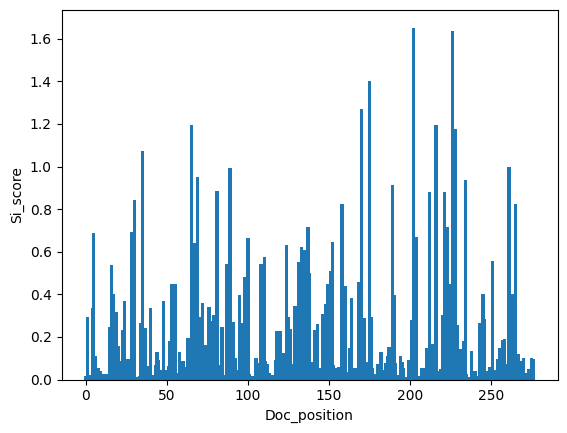

In [ ]:
import matplotlib.pyplot as plt
def Si(prob):
     return 0*prob[0]+1*prob[1]+2*prob[2]
Si_Score=[]
Si_Score1=[]
Si_Score2=[]
for i in range(len(probs_re)):
    Si_Score.append([Si(probs_re[i]),i])
    Si_Score1.append(Si(probs_re[i]))
    Si_Score2.append(i)
Si_Score.sort()
Si_Score=Si_Score[::-1]
plt.xlabel("Doc_position")
plt.ylabel("Si_score")
plt.bar(Si_Score2,Si_Score1,width=2.0);

In [ ]:
Si_Score

[[1.6519740321867291, 202],
 [1.6376937696029243, 226],
 [1.4024911257138746, 175],
 [1.2697352920812224, 170],
 [1.1960851837872448, 216],
 [1.1954667485102017, 65],
 [1.1777276875285219, 228],
 [1.0706664600431413, 35],
 [0.9974657441228796, 261],
 [0.9907910709861658, 89],
 [0.9503298438485486, 69],
 [0.9387828858135837, 234],
 [0.9108522364984757, 189],
 [0.8835019219828193, 81],
 [0.8819443208252653, 212],
 [0.8782493288371143, 221],
 [0.8418707653408508, 30],
 [0.8247087402625751, 265],
 [0.82375337923099, 158],
 [0.716464380534335, 137],
 [0.7138207720328348, 223],
 [0.6943727761420315, 28],
 [0.6871589167959264, 5],
 [0.671417559374849, 204],
 [0.6665241219509952, 100],
 [0.6461669265322987, 152],
 [0.6400950276103715, 67],
 [0.6337045121024055, 124],
 [0.6240447029272292, 133],
 [0.6058803351474724, 135],
 [0.5758550562925935, 110],
 [0.5563358722833938, 251],
 [0.551813586099328, 131],
 [0.5433869084202111, 87],
 [0.5423012071915031, 108],
 [0.5389477096089651, 16],
 [0.50797

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7689530685920578


In [ ]:
import sklearn
print(sklearn.__version__)
!pip install -U scikit-learn

1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


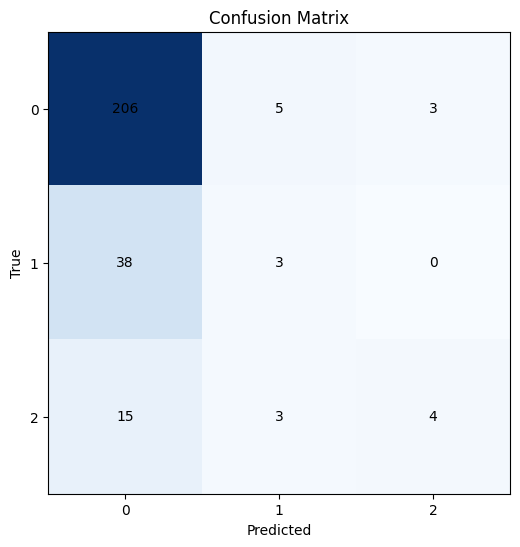

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks([0,1, 2])
ax.set_yticks([0,1, 2])
ax.set_xticklabels(['0', '1','2'])
ax.set_yticklabels(['0','1','2'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
for i in range(3):
    for j in range(3):
        ax.text(j, i, f'{cm[i, j]:.0f}', ha='center', va='center', color='black' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

In [ ]:
def DCG(C,Y):
    s=0
    for i in range(len(C)):
        s=s+(C[i]*(2**Y[i]-1))
    return s
def DCG_C(L,n):
    C=[]
    for i in range(1,n+1):
        if i<=L:
           C.append(1/math.log(1+i,2))
        else:
           C.append(0)
    return C

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Load Boston housing dataset
#boston = load_boston()

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regression model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbr.predict(X_test)

# Calculate the mean squared error
#mse = mean_squared_error(y_test, y_pred)

#print("Mean Squared Error: ", mse)
y_pred

array([-7.96370943e-02,  3.75036769e-01,  1.81854613e-02, -1.88170489e-03,
        7.76429627e-01,  5.66909414e-01,  4.79251071e-01,  1.10087634e-01,
        1.01370933e-01,  3.50880260e-03,  5.31579399e-02,  5.96272039e-02,
        2.12983104e-01, -2.07543248e-02,  3.56818845e-02,  3.51372281e-01,
        4.79400210e-01,  7.39771045e-01, -5.18319913e-03,  6.64943362e-01,
        3.35920979e-01,  5.43272494e-02,  1.91566236e-02,  3.17652852e-01,
        6.26610694e-01, -8.71364189e-03,  3.45017030e-01, -1.48521892e-02,
        9.43361351e-01, -4.36432963e-02,  6.60297135e-01,  6.05036153e-02,
       -1.53288906e-02,  2.94833231e-02,  3.25919831e-01,  1.21233859e+00,
        1.45011417e-01,  3.84023353e-01,  5.55139279e-02,  1.02384060e-01,
        5.00580642e-01,  1.47449008e-01,  8.33096920e-03,  2.11897670e-01,
        6.21052877e-02,  2.72399118e-02, -1.45619717e-02,  2.17226365e-02,
        6.36614857e-01,  2.59662742e-02,  1.15411123e-01,  2.06117368e-01,
        2.22486748e-01,  

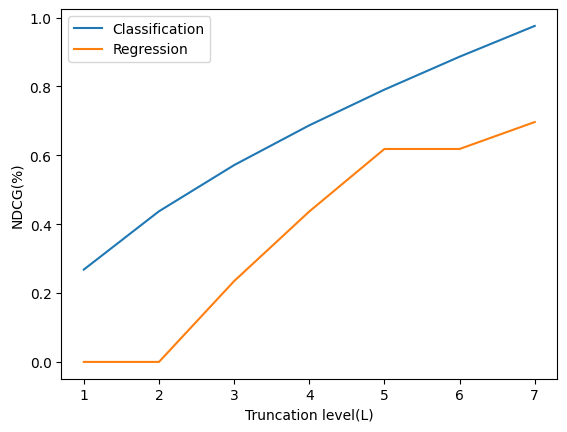

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
testy=np.array(y_test)
predy=np.array(y_pred)
predy=[list(predy)]
testy=[list(testy)]
ndcg_df1=[]
idcg=dcg_score(testy,testy,k=3)
for i in range(1,8):
   dcg=dcg_score(testy,predy,k=i)
   ndcg_df1.append(dcg/idcg)
plt.plot(list(range(1,8)),ndcg_df)
plt.plot(list(range(1,8)),ndcg_df1)
plt.xlabel("Truncation level(L)")
plt.ylabel("NDCG(%)")
plt.legend(["Classification","Regression"]);

In [ ]:
ndcg_df1

[0.0,
 0.0,
 0.23463936301137828,
 0.4367467095119258,
 0.6182885020492785,
 0.6182885020492785,
 0.6965016230530713]